# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

# Data loading

In [ ]:
npz_path = '/content/drive/MyDrive/container_traces.npz'
npz_path_mbedtls = '/content/drive/MyDrive/container_traces_mbedtls.npz'

def load_np_traces(traces_path):

  data = np.load(traces_path)

  traces=data["traces"]
  labels=data["labels"]

  return traces, labels

# Leakage evaluation

SNR

In [ ]:
def compute_snr(traces, labels, num_classes=256, epsilon=1e-9):
    trace_length = traces.shape[1]
    mean = np.zeros((num_classes, trace_length))
    var = np.zeros((num_classes, trace_length))
    cpt = np.zeros(num_classes)

    for i, trace in enumerate(traces):
        label = labels[i]
        mean[label] += trace
        var[label] += trace ** 2
        cpt[label] += 1

    for c in range(num_classes):
        if cpt[c] == 0:
            continue
        mean[c] /= cpt[c]
        var[c] = var[c] / cpt[c] - mean[c] ** 2
        var[c][np.abs(var[c]) < epsilon] = epsilon

    var_mean = np.var(mean, axis=0)
    mean_var = np.mean(var, axis=0)

    return var_mean / mean_var

In [ ]:
t_labels = labels_sim_profiling.reshape(5000, 16)

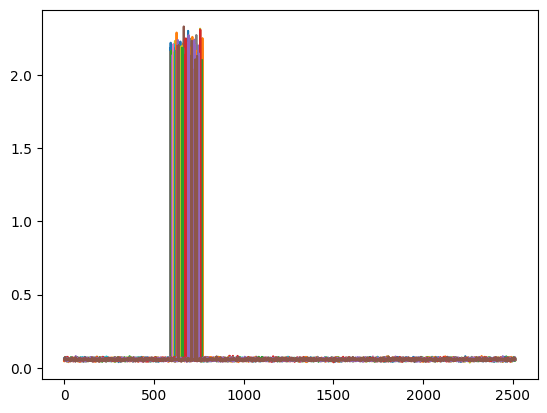

In [ ]:
for target_byte in range(16):
  labels_byte_i = t_labels[:, target_byte]
  snr_byte_i = compute_snr(traces_sim_profiling, labels_byte_i)

  plt.plot(snr_byte_i)
plt.show()

In [ ]:
traces_sim_profiling, labels_sim_profiling = load_np_traces(npz_path)
# traces_sim_profiling = load_np_traces(npz_path)

In [ ]:
print(traces_sim_profiling.shape)
print(labels_sim_profiling.shape)

(5000, 2514)
(1, 5000, 16)


In [ ]:
labels_sim_profiling = labels_sim_profiling.reshape(5000, 16)

In [ ]:
traces_sim_profiling.shape

(5000, 2514)

In [ ]:
snr = calculate_snr(traces_sim_profiling, labels_sim_profiling)

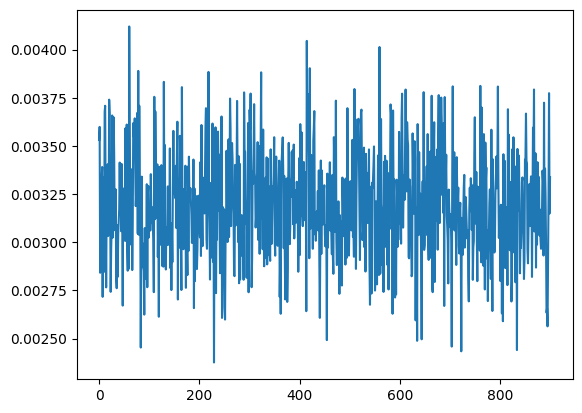

In [ ]:
plt.plot(snr)

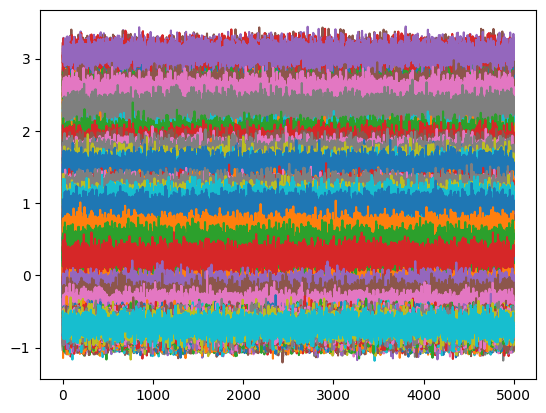

In [ ]:
plt.plot(traces_sim_profiling)

In [ ]:
# try to center the traces
traces_centered = np.array(traces_sim_profiling.shape)

print(traces_centered)

# for trace in traces_sim_profiling:
#   trace -= np.mean(trace)
#   trace /= np.std(trace)

#   traces_centered.append(trace)

[5000 2514]


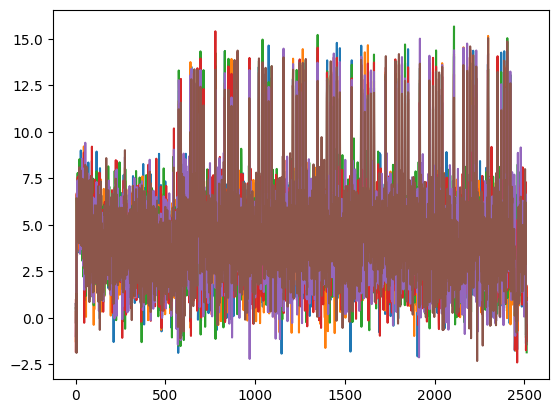

In [ ]:
for i in range(6):
  plt.plot(traces_sim_profiling[i])
plt.show()

Since the baseline noise is gaussian, 'fat' regions of no memory access are seen - not similar to the real world where the noise is more structured. Real traces would have 'thinner' areas outside of leaking points.

In [ ]:
target_labels = labels_sim_profiling

In [ ]:
target_labels

array([[175,  45,   2, ..., 157, 197,  24],
       [216, 196, 208, ...,  45,  43, 219],
       [ 68, 110, 123, ..., 195, 246, 206],
       ...,
       [181,  58,  26, ...,  30,  50, 110],
       [247,  84, 236, ..., 217,  47,  58],
       [ 50, 231,   3, ..., 167, 254,  81]], dtype=uint8)

In [ ]:
test_target = []
for bs in target_labels:
  np_arr = np.frombuffer(bs, dtype=np.uint8)
  test_target.append(np_arr)

len(test_target)

5000

In [ ]:
for t in test_target:
  if t.shape[0] != 16:
    print(f"Wrong shape for {t} ({t.shape[0]})")

In [ ]:
tolerance = 1e-9

for t in var:
  close_to_zero = np.abs(t) < tolerance
  if np.sum(close_to_zero) > 0:
    print("Trace has zeros")

In [ ]:
target_labels

array([[167,  44,  54, ..., 242, 167, 210],
       [108, 126, 243, ..., 225,  48,  75],
       [234, 250,  46, ..., 125,   1, 176],
       ...,
       [ 29,  82, 140, ...,  94,  45,   7],
       [132, 254,   1, ..., 221, 233,  23],
       [ 70, 164, 110, ...,  19, 235,  45]], dtype=uint8)

NOTE: calculations done on the whole labels -> different than ASCAD did it

In [ ]:
trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

In [ ]:
varMean = np.var(mean,0)
meanVar = np.mean(var,0)

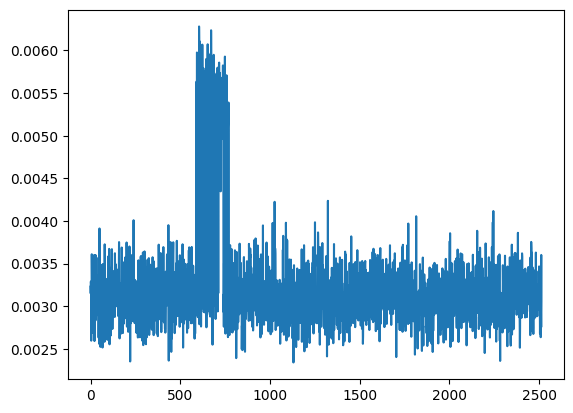

In [ ]:
plt.plot(varMean/meanVar)

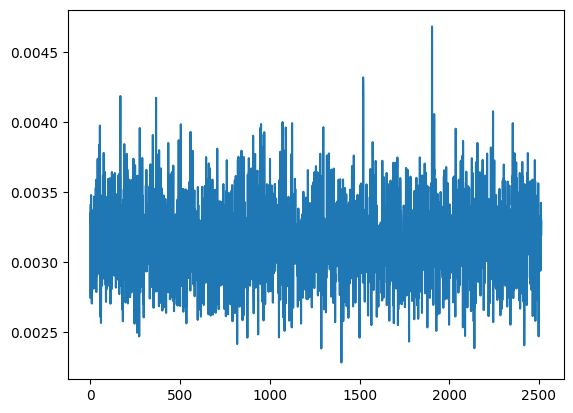

In [ ]:
# 'Desynced' plot
plt.plot(varMean/meanVar)

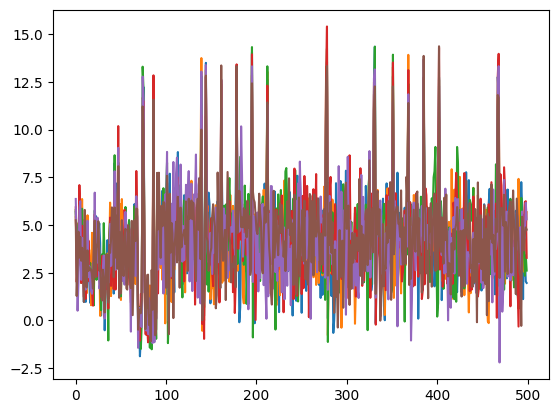

In [ ]:
# zoom in
for i in range(6):
  plt.plot(traces_sim_profiling[i][500:1000])
plt.show()

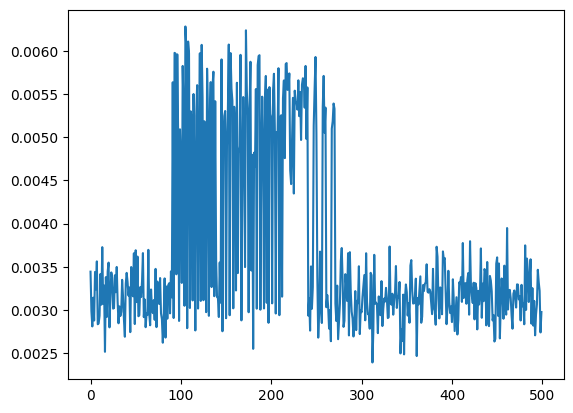

In [ ]:
plt.plot((varMean/meanVar)[500:1000])

# Synced attempt

In [ ]:
npz_path_synced = '/content/drive/MyDrive/container_tracessynced.npz'

traces_sim_profiling, labels_sim_profiling = load_np_traces(npz_path_synced)

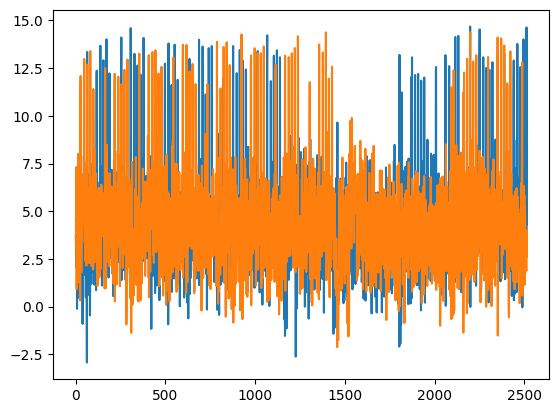

In [ ]:
for i in range(2):
  plt.plot(traces_sim_profiling[i])


In [ ]:
target_labels = labels_sim_profiling

In [ ]:
trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

In [ ]:
varMean = np.var(mean,0)
meanVar = np.mean(var,0)

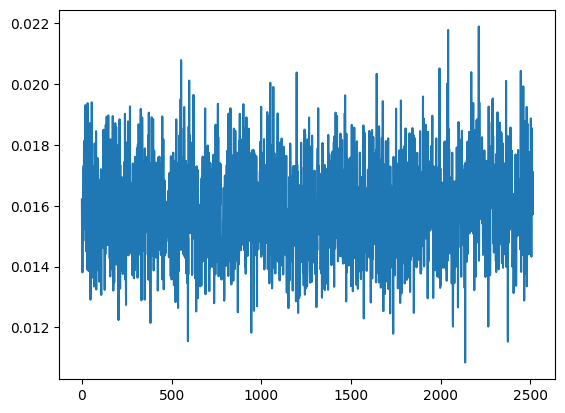

In [ ]:
# 'Desynced' plot
plt.plot(varMean/meanVar)

# Desynced attempt

In [ ]:
npz_path_synced = '/content/drive/MyDrive/container_tracesdesynced_42.npz'

traces_sim_profiling, labels_sim_profiling = load_np_traces(npz_path_synced)

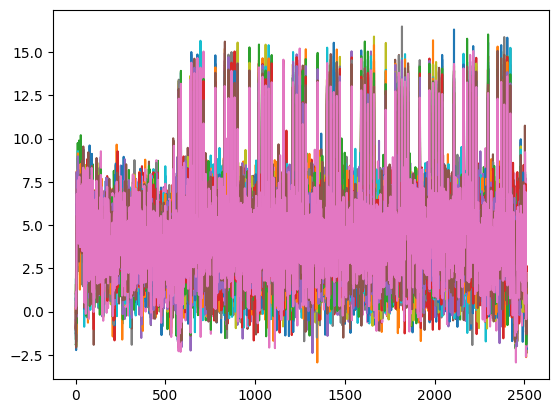

In [ ]:
for i in range(27):
  plt.plot(traces_sim_profiling[i])


In [ ]:
target_labels = labels_sim_profiling

In [ ]:
trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

In [ ]:
varMean = np.var(mean,0)
meanVar = np.mean(var,0)

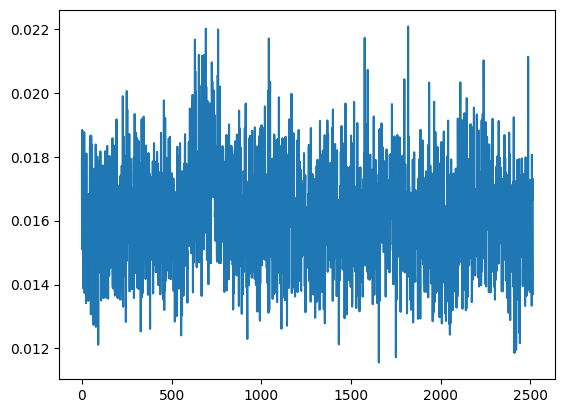

In [ ]:
# 'Desynced' plot
plt.plot(varMean/meanVar)

# Dell generated

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

npz_path = '/content/drive/MyDrive/container_traces_dell.npz'

def load_np_traces(traces_path):

  data = np.load(traces_path)

  traces=data["traces"]
  labels=data["labels"]

  return traces, labels

In [ ]:
traces_sim_profiling, labels_sim_profiling = load_np_traces(npz_path)

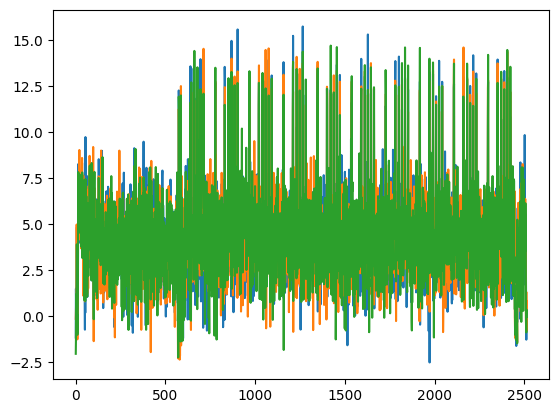

In [ ]:
import matplotlib.pyplot as plt

for i in range(3):
  plt.plot(traces_sim_profiling[i])

plt.show()

In [ ]:
t_labels = target_labels.reshape((5000, 16))

In [ ]:
t_labels.shape

(5000, 16)

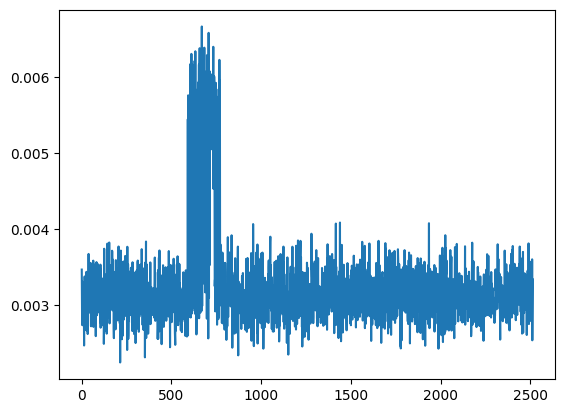

In [ ]:
target_labels = t_labels
tolerance = 1e-9

trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

varMean = np.var(mean,0)
meanVar = np.mean(var,0)

plt.plot(varMean/meanVar)
plt.show()

# MBEDTLS traces

## Unmasked

In [ ]:
traces_sim_profiling, labels_sim_profiling = load_np_traces(npz_path_mbedtls)

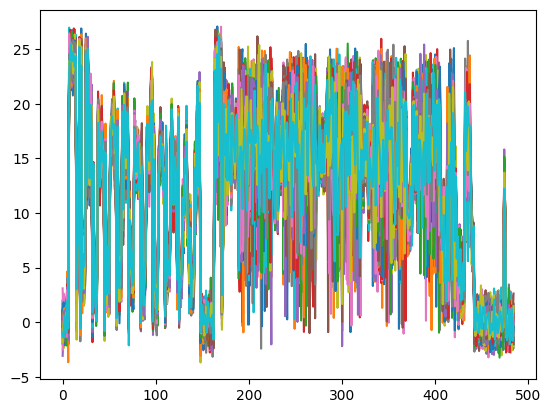

In [ ]:
import matplotlib.pyplot as plt

for i in range(90):
  plt.plot(traces_sim_profiling[i])

plt.show()

In [ ]:
target_labels = labels_sim_profiling
print(target_labels.shape)

(1, 5000, 16)


In [ ]:
t_labels = target_labels.reshape((5000, 16))

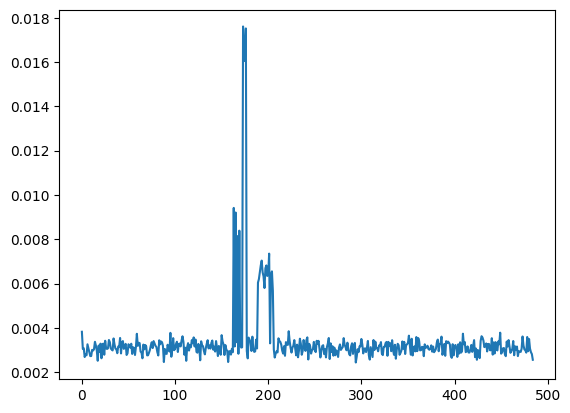

In [ ]:
target_labels = t_labels
tolerance = 1e-9

trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

varMean = np.var(mean,0)
meanVar = np.mean(var,0)

plt.plot(varMean/meanVar)
plt.show()

SNR spikes are clearly visible, which is in alignment with the fact that the vanilla `mbedtls` implementation doesn't include any kind of SCA protections as stated in their [documentation](https://github.com/Mbed-TLS/mbedtls/security/policy#local-non-timing-side-channels).

The fact is further supported by `mbedtls` implementation being easily succeptible even to a simple CPA attack, where the whole key was successfully extracted.

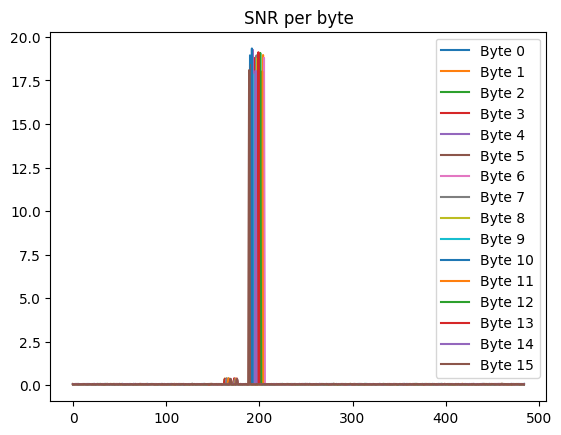

In [ ]:
# Try with better SNR

for byte_idx in range(16):
  labels_i = t_labels[:, byte_idx]
  snr_i = compute_snr(traces_sim_profiling, labels_i)
  plt.plot(snr_i, label=f'Byte {byte_idx}')

plt.legend()
plt.title("SNR per byte")
plt.show()

## Masked

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

def load_np_traces(traces_path):

  data = np.load(traces_path)

  traces=data["traces"]
  labels=data["labels"]
  plaintexts=data['plaintexts']
  keys=data['key']

  return traces, labels, plaintexts, keys

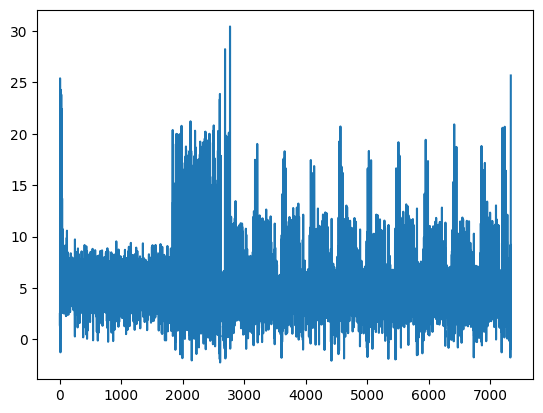

(499, 16)


In [ ]:
# npz_path_mbedtls_masked = '/content/drive/MyDrive/profiling_mbedtls_masked_20250707_232131.npz'
# npz_path_mbedtls_masked = '/content/drive/MyDrive/profiling_chunk_5000.npz'
# npz_path_mbedtls_masked = '/content/drive/MyDrive/profiling_chunk_99_mbedtls_masked_20250712_122806.npz'
# npz_path_mbedtls_masked = '/content/drive/MyDrive/profiling_chunk_200_mbedtls_masked_20250719_181954.npz' # After fixing the trace gen (it was previously stopping at hrmac)
# npz_path_mbedtls_masked = '/content/drive/MyDrive/profiling_chunk_200_mbedtls_masked_20250722_194326.npz' # After only memory tracing
# npz_path_mbedtls_masked = '/content/drive/MyDrive/profiling_chunk_200_mbedtls_masked_20250722_194326.npz' # After not exposing masked byte...
npz_path_mbedtls_masked = '/content/drive/MyDrive/profiling_chunk_499_mbedtls_masked_20250724_003447.npz' # After adding temp masks (r_in^m_in) & (r_out^m_out) instead of calculating with x'

traces_sim_profiling, labels_sim_profiling, pts, keys = load_np_traces(npz_path_mbedtls_masked)
import matplotlib.pyplot as plt

for i in range(1):
  plt.plot(traces_sim_profiling[i])

plt.show()

target_labels = labels_sim_profiling
print(target_labels.shape)

Calculate SNR per byte

In [ ]:
labels_byte_i = labels_sim_profiling[:, 2]

def compute_snr(traces, labels, num_classes=256, epsilon=1e-9):
    trace_length = traces.shape[1]
    mean = np.zeros((num_classes, trace_length))
    var = np.zeros((num_classes, trace_length))
    cpt = np.zeros(num_classes)

    for i, trace in enumerate(traces):
        label = labels[i]
        mean[label] += trace
        var[label] += trace ** 2
        cpt[label] += 1

    for c in range(num_classes):
        if cpt[c] == 0:
            continue
        mean[c] /= cpt[c]
        var[c] = var[c] / cpt[c] - mean[c] ** 2
        var[c][np.abs(var[c]) < epsilon] = epsilon

    var_mean = np.var(mean, axis=0)
    mean_var = np.mean(var, axis=0)

    return var_mean / mean_var

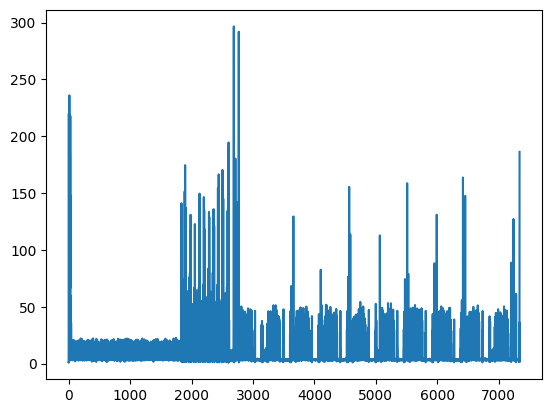

In [ ]:
snr_byte_2 = compute_snr(traces_sim_profiling, labels_byte_i)

plt.plot(snr_byte_2)
plt.show()

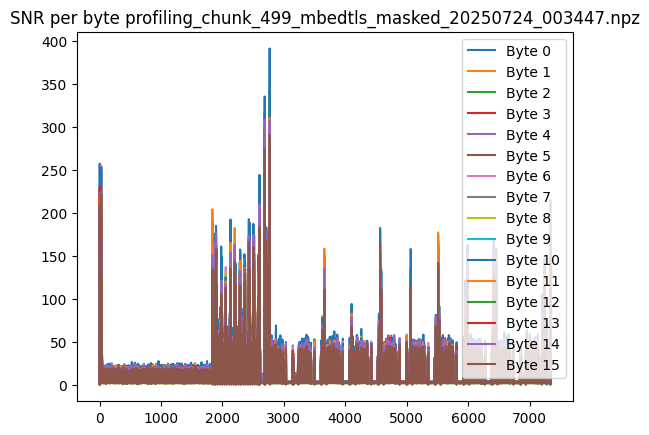

In [ ]:
for byte_idx in range(16):
  labels_i = labels_sim_profiling[:, byte_idx]
  snr_i = compute_snr(traces_sim_profiling, labels_i)
  plt.plot(snr_i, label=f'Byte {byte_idx}')

plt.legend()
plt.title(f"SNR per byte {npz_path_mbedtls_masked.split('/')[-1]}")
plt.show()

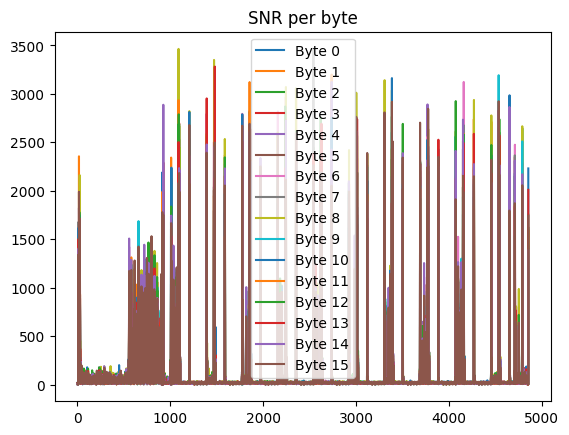

In [ ]:
for byte_idx in range(16):
  labels_i = labels_sim_profiling[:, byte_idx]
  snr_i = compute_snr(traces_sim_profiling, labels_i)
  plt.plot(snr_i, label=f'Byte {byte_idx}')

plt.legend()
plt.title("SNR per byte")
plt.show()

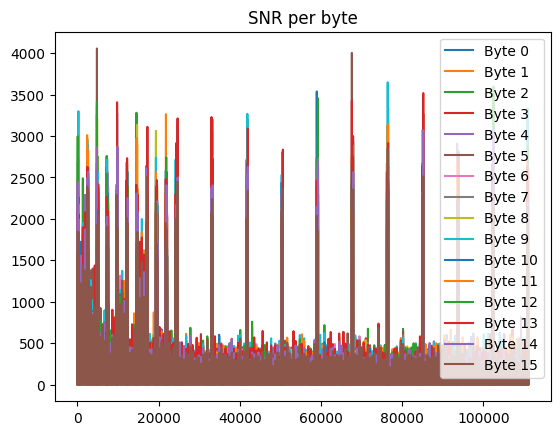

In [ ]:
for byte_idx in range(16):
  labels_i = labels_sim_profiling[:, byte_idx]
  snr_i = compute_snr(traces_sim_profiling, labels_i)
  plt.plot(snr_i, label=f'Byte {byte_idx}')

plt.legend()
plt.title("SNR per byte")
plt.show()

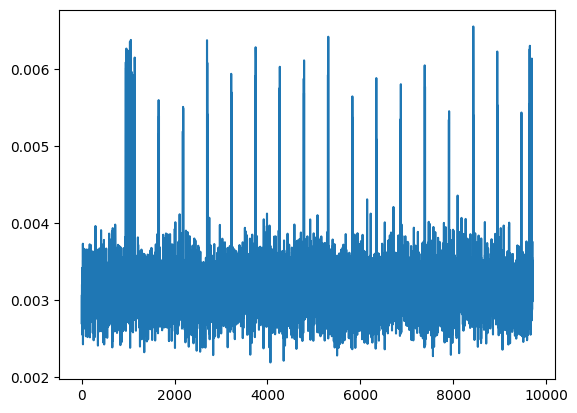

In [ ]:
tolerance = 1e-9

trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

varMean = np.var(mean,0)
meanVar = np.mean(var,0)

plt.plot(varMean/meanVar)
plt.show()

In [ ]:
npz_path_mbedtls_masked = '/content/drive/MyDrive/container_traces_mbedtls_masked_valid.npz'
traces_sim_profiling, labels_sim_profiling = load_np_traces(npz_path_mbedtls_masked)

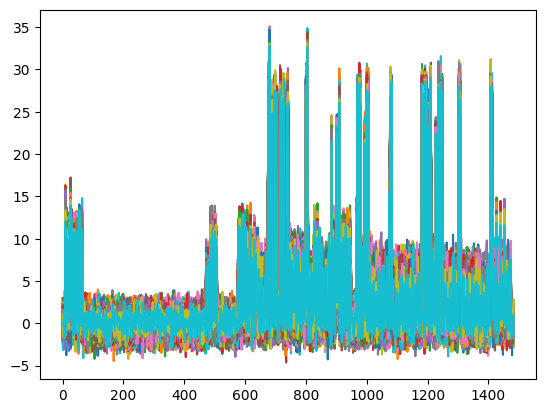

In [ ]:
for i in range(200):
  plt.plot(traces_sim_profiling[i])

plt.show()

In [ ]:
target_labels = labels_sim_profiling
print(target_labels.shape)

(1, 1000, 16)


In [ ]:
t_labels = target_labels.reshape((1000, 16))

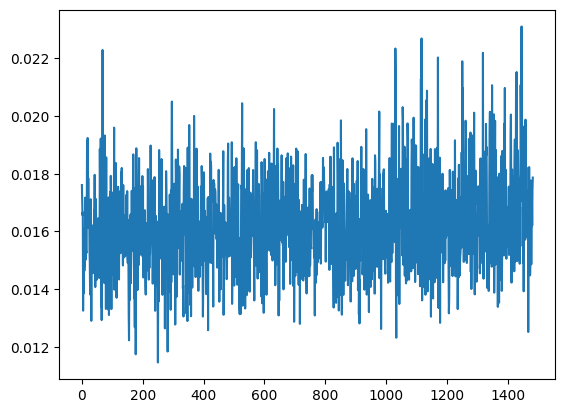

In [ ]:
target_labels = t_labels
tolerance = 1e-9

trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

varMean = np.var(mean,0)
meanVar = np.mean(var,0)

plt.plot(varMean/meanVar)
plt.show()

### v2

In [ ]:
npz_path_mbedtls_masked = '/content/drive/MyDrive/container_traces_mbedtls_masked_valid_v2.npz'
traces_sim_profiling, labels_sim_profiling = load_np_traces(npz_path_mbedtls_masked)

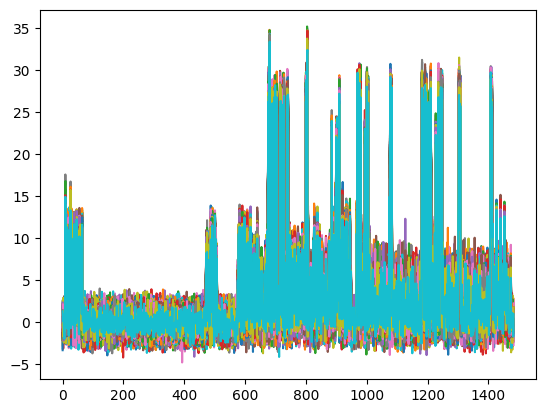

In [ ]:
for i in range(200):
  plt.plot(traces_sim_profiling[i])

plt.show()

In [ ]:
target_labels = labels_sim_profiling
print(target_labels.shape)

(1, 1000, 16)


In [ ]:
t_labels = target_labels.reshape((1000, 16))

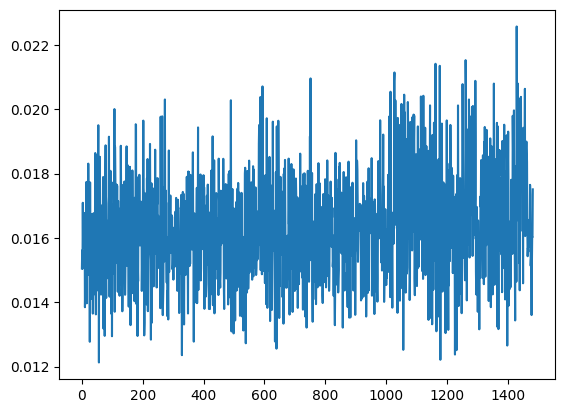

In [ ]:
target_labels = t_labels
tolerance = 1e-9

trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

varMean = np.var(mean,0)
meanVar = np.mean(var,0)

plt.plot(varMean/meanVar)
plt.show()

### v3

In [ ]:
npz_path_mbedtls_masked = '/content/drive/MyDrive/profiling_mbedtls_masked_20250706_191902.npz'
traces_sim_profiling, labels_sim_profiling = load_np_traces(npz_path_mbedtls_masked)

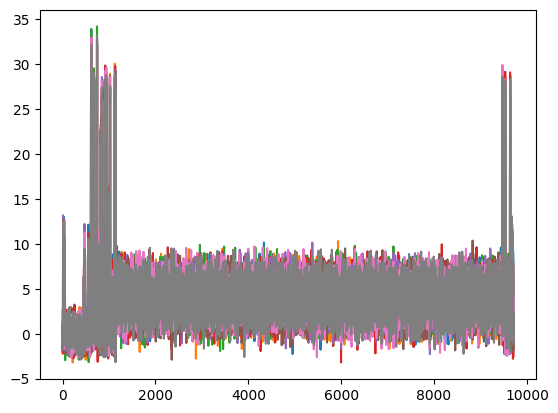

In [ ]:
for i in range(8):
  plt.plot(traces_sim_profiling[i])

plt.show()

In [ ]:
target_labels = labels_sim_profiling
print(target_labels.shape)

(10, 1, 10, 16)


In [ ]:
target_labels[0]

array([[[192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3],
        [192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3],
        [192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3],
        [192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3],
        [192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3],
        [192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3],
        [192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3],
        [192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3],
        [192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3],
        [192, 143, 111, 139, 129, 170, 148,  83,  50, 220, 104,  25,
         236, 230, 187,   3]]], dtype=ui

In [ ]:
t_labels = target_labels[0].reshape((10, 16))

/tmp/ipython-input-4282166609.py:19: RuntimeWarning: invalid value encountered in divide
  mean[i] = mean[i] / cpt[i]
/tmp/ipython-input-4282166609.py:20: RuntimeWarning: divide by zero encountered in divide
  var[i]  = var[i] / cpt[i] - np.square(mean[i])


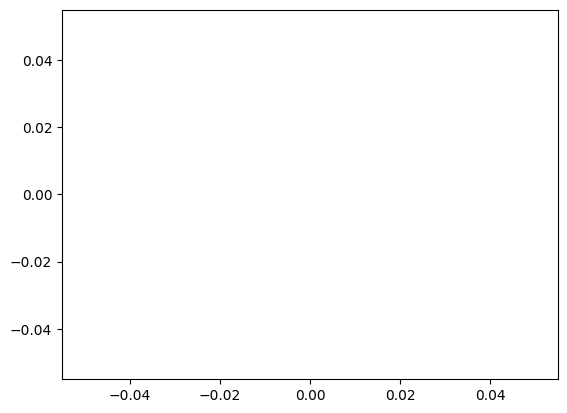

In [ ]:
target_labels = t_labels
tolerance = 1e-9

trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

varMean = np.var(mean,0)
meanVar = np.mean(var,0)

plt.plot(varMean/meanVar)
plt.show()

### optim

In [ ]:
def load_np_traces(traces_path):

  data = np.load(traces_path)

  profiling_traces=data["profiling_traces"]
  profiling_labels=data["profiling_labels"]

  attack_traces=data["attack_traces"]
  attack_labels=data["attack_labels"]

  return profiling_traces, profiling_labels # , attack_traces, attack_labels

In [ ]:
npz_path_mbedtls_masked = '/content/drive/MyDrive/masked_traces_20250707_220514.npz'
traces_sim_profiling, labels_sim_profiling = load_np_traces(npz_path_mbedtls_masked)

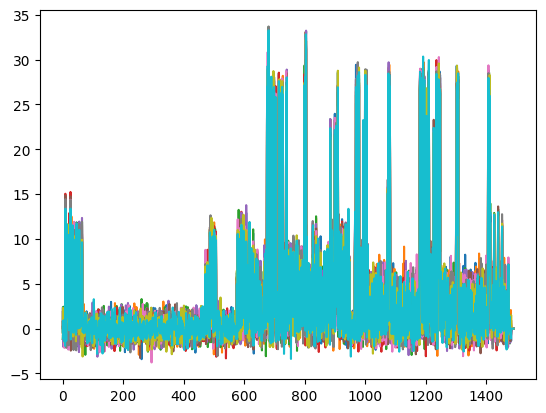

In [ ]:
for i in range(10):
  plt.plot(traces_sim_profiling[i])

plt.show()

In [ ]:
target_labels = labels_sim_profiling
print(target_labels.shape)

(20000,)


In [ ]:
t_labels = target_labels[0].reshape((10, 16))

ValueError: cannot reshape array of size 1 into shape (10,16)

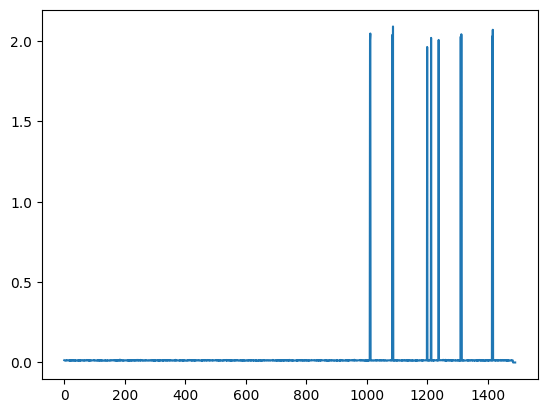

In [ ]:
target_labels = target_labels
tolerance = 1e-9

trace_length = traces_sim_profiling.shape[1]
mean = np.zeros([256, trace_length])
var = np.zeros([256, trace_length])
cpt = np.zeros(256)
i = 0

for trace in traces_sim_profiling:
  mean[target_labels[i]] += trace
  var[target_labels[i]] += np.square(trace)
  cpt[target_labels[i]] += 1
  i += 1

for i in range(256):
  if np.sum(np.abs(var[i]) < tolerance) > 0:
    var[i][np.abs(var[i]) < tolerance] = tolerance
  mean[i] = mean[i] / cpt[i]
  var[i]  = var[i] / cpt[i] - np.square(mean[i])

varMean = np.var(mean,0)
meanVar = np.mean(var,0)

plt.plot(varMean/meanVar)
plt.show()

In [ ]:
t_labels = target_labels[0].reshape((20000, 16))

### HDF5

In [2]:
def load_h5_data(file_path, load_meta=True):
    """
    Opens an HDF5 file and returns handles to the datasets.
    """
    try:
        in_file=h5py.File(file_path, "r")
        metadata = {
          "plaintexts": in_file['plaintexts'],
          "key": in_file['key'],
          "masks_rin": in_file['masks_rin'],
          "masks_rout": in_file['masks_rout'],
          "annotations_idcs": in_file['annotations_idcs'],
          "annotations_names": in_file['annotations_names'],
          "prands": in_file['prands'],
          "hashes": in_file['hashes']
        }
        data = {
            "traces": in_file['traces'],
            "labels": in_file['labels']
        }
        if load_meta:
          return data, metadata
        else:
          return data
    except IOError:
        print(f"Error: Can't open HDF5 file '{file_path}' for reading.")
        return None, None

In [3]:
def compute_snr_chunked(traces_h5, labels_h5, byte_index, chunk_size=5000, num_classes=256, epsilon=1e-9):
    """
    Computes SNR in chunks to avoid loading the entire dataset into memory.

    Args:
        traces_h5: The HDF5 dataset object for traces.
        labels_h5: The HDF5 dataset object for labels.
        byte_index: The key byte (0-15) to analyze.
        chunk_size: How many traces to process at a time.
    """
    num_traces, trace_length = traces_h5.shape

    # Initialize arrays to accumulate statistics
    mean = np.zeros((num_classes, trace_length))
    var = np.zeros((num_classes, trace_length))
    cpt = np.zeros(num_classes, dtype=int)

    # Process the data in chunks
    for i in range(0, num_traces, chunk_size):
        # Slice a chunk from the HDF5 file (this is memory-efficient)
        traces_chunk = traces_h5[i:i+chunk_size]
        # Get the labels for the target byte
        labels_chunk = labels_h5[i:i+chunk_size, byte_index]

        # Accumulate statistics for this chunk
        for c in range(num_classes):
            # Find all traces in the chunk that correspond to class 'c'
            class_traces = traces_chunk[labels_chunk == c]
            if class_traces.shape[0] > 0:
                mean[c] += np.sum(class_traces, axis=0)
                var[c] += np.sum(class_traces**2, axis=0)
                cpt[c] += class_traces.shape[0]

    # Calculate the final mean and variance
    for c in range(num_classes):
        if cpt[c] > 0:
            mean[c] /= cpt[c]
            var[c] = (var[c] / cpt[c]) - (mean[c]**2)

    # Avoid division by zero
    var[np.abs(var) < epsilon] = epsilon

    # Calculate the final SNR
    var_of_means = np.var(mean, axis=0)
    mean_of_vars = np.mean(var, axis=0)

    return var_of_means / mean_of_vars

## Data postprocessing - POI Window selection

In [ ]:
def extract_windows(traces, peak_idx, win_radius):
    T, L = traces.shape
    windows = np.zeros((T, 2*win_radius+1))
    for t in range(T):
        start = max(0, peak_idx - win_radius)
        end = min(L, peak_idx + win_radius + 1)
        segment = traces[t, start:end]
        padded = np.zeros(2*win_radius+1)
        padded[:len(segment)] = segment
        windows[t] = padded
    return windows

In [ ]:
# h5_profiling_file_path = '/content/drive/MyDrive/mbedtls_synthetic_traces/profiling_mbedtls_masked_20250727_235810.h5'
# h5_attack_file_path = '/content/drive/MyDrive/mbedtls_synthetic_traces/attack_mbedtls_masked_20250727_235810.h5'

h5_profiling_file_path = "/content/drive/MyDrive/mbedtls_synthetic_traces/profiling_mbedtls_masked_20250728_012224.h5"
h5_attack_file_path = "/content/drive/MyDrive/mbedtls_synthetic_traces/attack_mbedtls_masked_20250728_012224.h5"

# profiling_traces, profiling_labels, anno_idcs, anno_names
profiling_data, profiling_metadata = load_h5_data(h5_profiling_file_path)
attack_data, attack_metadata = load_h5_data(h5_attack_file_path)

In [ ]:
profiling_data['labels'].shape

(50001, 16)

In [ ]:
#POI processing

from scipy.signal import find_peaks

def process_all_bytes(data, metadata, input_path, output_dir, window_radius=20, top_n_peaks=5):
    os.makedirs(output_dir, exist_ok=True)
    # with h5py.File(input_path, "r") as f:
    #     traces = f['traces'][:]
    #     labels = f['labels'][:]

    for byte_idx in range(16):
        snr = compute_snr_chunked(data['traces'], data['labels'], byte_idx)
        peaks, _ = find_peaks(snr, distance=window_radius*2)
        top = np.argsort(snr[peaks])[-top_n_peaks:]
        top = peaks[top]

        # Prepare storage
        with h5py.File(os.path.join(output_dir, f"byte_{byte_idx}.h5"), "w") as outf:
            dst = []
            for pi in top:
                dst.append(extract_windows(data['traces'], pi, window_radius))
            # shape: (top_n, num_traces, window_length)
            dst = np.stack(dst, axis=1)
            outf.create_dataset("windows", data=dst)
            outf.create_dataset("labels", data=data['labels'][:, byte_idx])
            outf.create_dataset("metadata/plaintexts", data=metadata['plaintexts'][:, byte_idx])
            outf.create_dataset("metadata/key", data=metadata['key'][byte_idx])
            outf.create_dataset("metadata/masks_rin", data=metadata['masks_rin'])
            outf.create_dataset("metadata/masks_rout", data=metadata['masks_rout'])
            outf.create_dataset("metadata/annotations_idcs", data=metadata['annotations_idcs'])
            outf.create_dataset("metadata/annotations_names", data=metadata['annotations_names'])
            outf.create_dataset("metadata/prands", data=metadata['prands'])
            outf.create_dataset("metadata/hashes", data=metadata['hashes'])
            outf.create_dataset("metadata/peak_positions", data=top)
        print(f"[Byte {byte_idx}] saved {len(top)} windows of size {2*window_radius+1}")

### Synthetic traces - random PT

In [ ]:
process_all_bytes(h5_profiling_file_path, "/content/drive/MyDrive/mbedtls_synthetic_traces/profiling_windows", window_radius=350)

[Byte 0] saved 5 windows of size 701
[Byte 1] saved 5 windows of size 701
[Byte 2] saved 5 windows of size 701
[Byte 3] saved 5 windows of size 701
[Byte 4] saved 5 windows of size 701
[Byte 5] saved 5 windows of size 701
[Byte 6] saved 5 windows of size 701
[Byte 7] saved 5 windows of size 701
[Byte 8] saved 5 windows of size 701
[Byte 9] saved 5 windows of size 701
[Byte 10] saved 5 windows of size 701
[Byte 11] saved 5 windows of size 701
[Byte 12] saved 5 windows of size 701
[Byte 13] saved 5 windows of size 701
[Byte 14] saved 5 windows of size 701
[Byte 15] saved 5 windows of size 701


In [ ]:
process_all_bytes(h5_attack_file_path, "/content/drive/MyDrive/mbedtls_synthetic_traces/attack_windows", window_radius=350)

[Byte 0] saved 5 windows of size 701
[Byte 1] saved 5 windows of size 701
[Byte 2] saved 5 windows of size 701
[Byte 3] saved 5 windows of size 701
[Byte 4] saved 5 windows of size 701
[Byte 5] saved 5 windows of size 701
[Byte 6] saved 5 windows of size 701
[Byte 7] saved 5 windows of size 701
[Byte 8] saved 5 windows of size 701
[Byte 9] saved 5 windows of size 701
[Byte 10] saved 5 windows of size 701
[Byte 11] saved 5 windows of size 701
[Byte 12] saved 5 windows of size 701
[Byte 13] saved 5 windows of size 701
[Byte 14] saved 5 windows of size 701
[Byte 15] saved 5 windows of size 701


### Synthetic traces - RPA PT

Follows the distribution of the RPA plaintext $x_i | i \in 0...15 x_i = 0 for i < 13 byte[i-13][prand] otherwise$

In [ ]:
profiling_rpa_filepath = "/content/drive/MyDrive/mbedtls_synthetic_traces/profiling_mbedtls_masked_20250816_221308.h5"
attack_rpa_filepath = "/content/drive/MyDrive/mbedtls_synthetic_traces/attack_mbedtls_masked_20250816_221308.h5"

profiling_data, profiling_metadata = load_h5_data(profiling_rpa_filepath)
attack_data, attack_metadata = load_h5_data(attack_rpa_filepath)

process_all_bytes(profiling_data, profiling_metadata, profiling_rpa_filepath, "/content/drive/MyDrive/mbedtls_synthetic_traces/RPA_traces/profiling_windows", window_radius=350)
process_all_bytes(attack_data, attack_metadata, attack_rpa_filepath, "/content/drive/MyDrive/mbedtls_synthetic_traces/RPA_traces/attack_windows", window_radius=350)

[Byte 0] saved 5 windows of size 701
[Byte 1] saved 5 windows of size 701
[Byte 2] saved 5 windows of size 701
[Byte 3] saved 5 windows of size 701
[Byte 4] saved 5 windows of size 701
[Byte 5] saved 5 windows of size 701
[Byte 6] saved 5 windows of size 701
[Byte 7] saved 5 windows of size 701
[Byte 8] saved 5 windows of size 701
[Byte 9] saved 5 windows of size 701
[Byte 10] saved 5 windows of size 701
[Byte 11] saved 5 windows of size 701
[Byte 12] saved 5 windows of size 701
[Byte 13] saved 5 windows of size 701
[Byte 14] saved 5 windows of size 701
[Byte 15] saved 5 windows of size 701


### Synthetic traces - RPA PT [VARIABLE key]

In [ ]:
# Scratch cell - delete after use

path = "/content/drive/MyDrive/mbedtls_synthetic_traces/v2_attack_mbedtls_masked_20250820_111004.h5"

f = h5py.File(path, 'r')

print(f['labels'][0])
print(f['labels'][-1])
print(f['labels'][42])

[ 23  58 158  48  20 243  54 183 132  48 171 219 209  98  86  74]
[ 23  58 158  48  20 243  54 183 132  48 171 219 209 172  64   8]
[ 23  58 158  48  20 243  54 183 132  48 171 219 209 205 105  24]


In [ ]:
profiling_rpa_filepath = "/content/drive/MyDrive/mbedtls_synthetic_traces/v2_profiling_mbedtls_masked_20250820_111004.h5"
attack_rpa_filepath = "/content/drive/MyDrive/mbedtls_synthetic_traces/v2_attack_mbedtls_masked_20250820_111004.h5"

profiling_data, profiling_metadata = load_h5_data(profiling_rpa_filepath)
attack_data, attack_metadata = load_h5_data(attack_rpa_filepath)

process_all_bytes(profiling_data, profiling_metadata, profiling_rpa_filepath, "/content/drive/MyDrive/mbedtls_synthetic_traces/RPA_traces/v2_profiling_windows", window_radius=350)
process_all_bytes(attack_data, attack_metadata, attack_rpa_filepath, "/content/drive/MyDrive/mbedtls_synthetic_traces/RPA_traces/v2_attack_windows", window_radius=350)

[Byte 0] saved 5 windows of size 701
[Byte 1] saved 5 windows of size 701
[Byte 2] saved 5 windows of size 701
[Byte 3] saved 5 windows of size 701
[Byte 4] saved 5 windows of size 701
[Byte 5] saved 5 windows of size 701
[Byte 6] saved 5 windows of size 701
[Byte 7] saved 5 windows of size 701
[Byte 8] saved 5 windows of size 701
[Byte 9] saved 5 windows of size 701
[Byte 10] saved 5 windows of size 701
[Byte 11] saved 5 windows of size 701
[Byte 12] saved 5 windows of size 701
[Byte 13] saved 5 windows of size 701
[Byte 14] saved 5 windows of size 701
[Byte 15] saved 5 windows of size 701
[Byte 0] saved 5 windows of size 701
[Byte 1] saved 5 windows of size 701
[Byte 2] saved 5 windows of size 701
[Byte 3] saved 5 windows of size 701
[Byte 4] saved 5 windows of size 701
[Byte 5] saved 5 windows of size 701
[Byte 6] saved 5 windows of size 701
[Byte 7] saved 5 windows of size 701
[Byte 8] saved 5 windows of size 701
[Byte 9] saved 5 windows of size 701
[Byte 10] saved 5 windows of siz

---

Computing SNR for Key Byte 0...
Computing SNR for Key Byte 1...
Computing SNR for Key Byte 2...
Computing SNR for Key Byte 3...
Computing SNR for Key Byte 4...
Computing SNR for Key Byte 5...
Computing SNR for Key Byte 6...
Computing SNR for Key Byte 7...
Computing SNR for Key Byte 8...
Computing SNR for Key Byte 9...
Computing SNR for Key Byte 10...
Computing SNR for Key Byte 11...
Computing SNR for Key Byte 12...
Computing SNR for Key Byte 13...
Computing SNR for Key Byte 14...
Computing SNR for Key Byte 15...


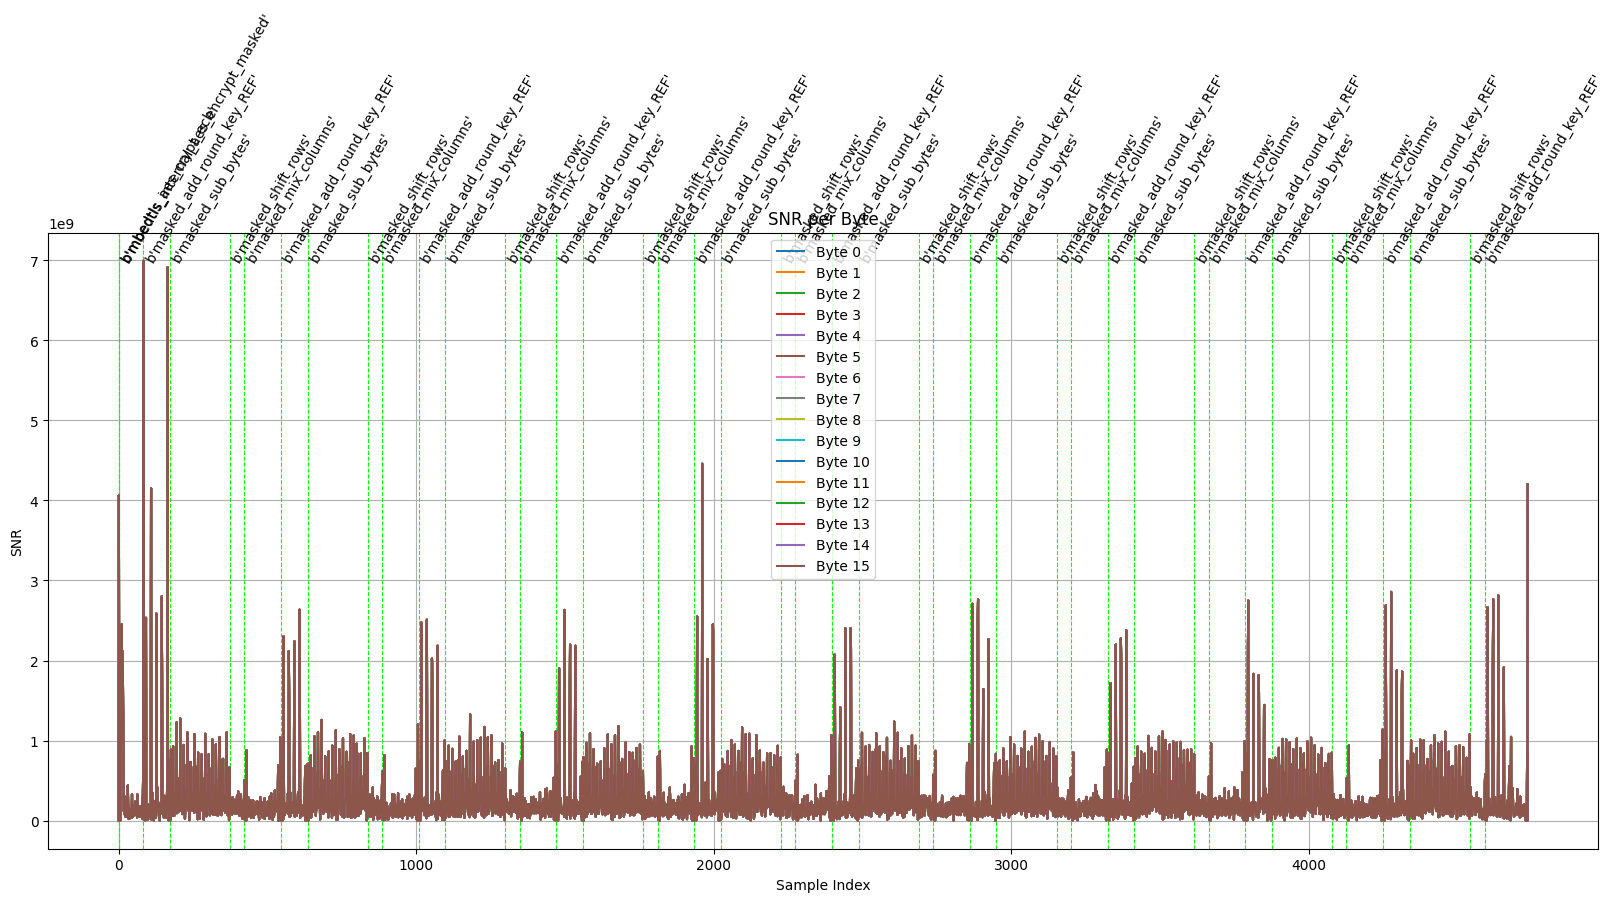

In [ ]:
# Full encryption - random PTs
# (key_expand + encrypt)

plt.figure(figsize=(20, 8))
first_run = True

for byte_index in range(16):
    print(f"Computing SNR for Key Byte {byte_index}...")
    snr_curve = compute_snr_chunked(profiling_traces, profiling_labels, byte_index)
    plt.plot(snr_curve, label=f'Byte {byte_index}')

    if first_run:
      first_run = False
      for sample_index, function_name in zip(anno_idcs, anno_names):
        # Draw a vertical dashed line at the function's start time
        plt.axvline(x=sample_index, color='lime', linestyle='--', linewidth=0.8)
        # Add a text label for the function name
        plt.text(sample_index, max(snr_curve), function_name, rotation=60)

plt.title("SNR per Byte")
plt.xlabel("Sample Index")
plt.ylabel("SNR")
plt.legend()
plt.grid(True)
plt.show()

Selected 4 Points of Interest (POIs).


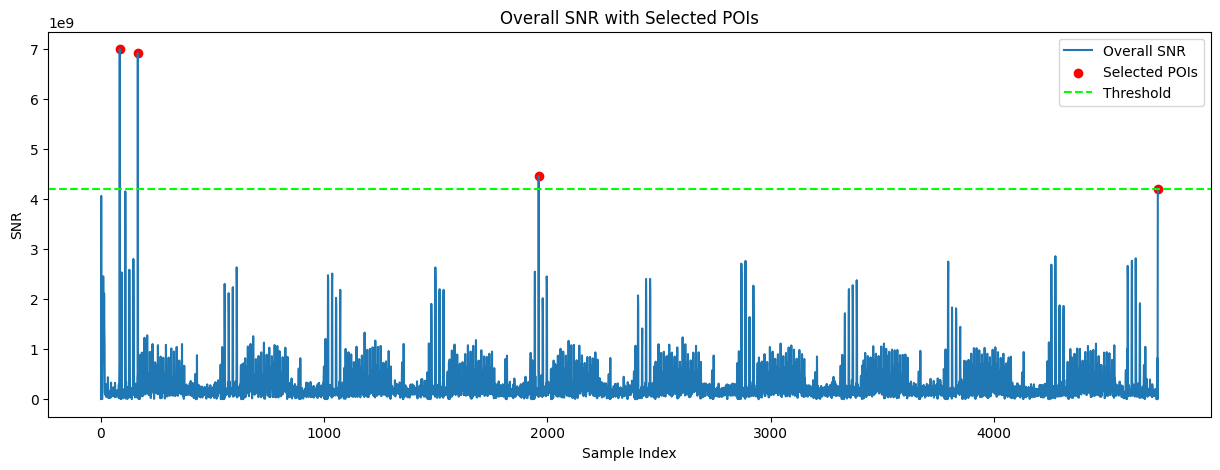

In [ ]:
snr_per_byte = np.array([compute_snr_chunked(profiling_traces, profiling_labels, byte) for byte in range(16)])
overall_snr = np.max(snr_per_byte, axis=0)
threshold = 0.6 * np.max(overall_snr)

# Find the indices of all points that are above the threshold
poi_indices = np.where(overall_snr > threshold)[0]

num_pois = len(poi_indices)
print(f"Selected {num_pois} Points of Interest (POIs).")

# --- Visualize your POIs ---
plt.figure(figsize=(15, 5))
plt.plot(overall_snr, label='Overall SNR')
plt.scatter(poi_indices, overall_snr[poi_indices], color='red', label='Selected POIs')
plt.axhline(y=threshold, color='lime', linestyle='--', label='Threshold')
plt.title("Overall SNR with Selected POIs")
plt.xlabel("Sample Index")
plt.ylabel("SNR")
plt.legend()
plt.show()

# RPA dataset

`mbedtls` traces with boolean masking applied on the RPA distribution.

prands head: [ 9984908  9929379 11168064  9835316  9496968]
hashes head: [[238 183  32]
 [179 245  19]
 [128  70 177]
 [ 29 182  96]
 [ 17 245 216]]
Computing SNR for Key Byte 0...
Computing SNR for Key Byte 1...
Computing SNR for Key Byte 2...
Computing SNR for Key Byte 3...
Computing SNR for Key Byte 4...
Computing SNR for Key Byte 5...
Computing SNR for Key Byte 6...
Computing SNR for Key Byte 7...
Computing SNR for Key Byte 8...
Computing SNR for Key Byte 9...
Computing SNR for Key Byte 10...
Computing SNR for Key Byte 11...
Computing SNR for Key Byte 12...
Computing SNR for Key Byte 13...
Computing SNR for Key Byte 14...
Computing SNR for Key Byte 15...


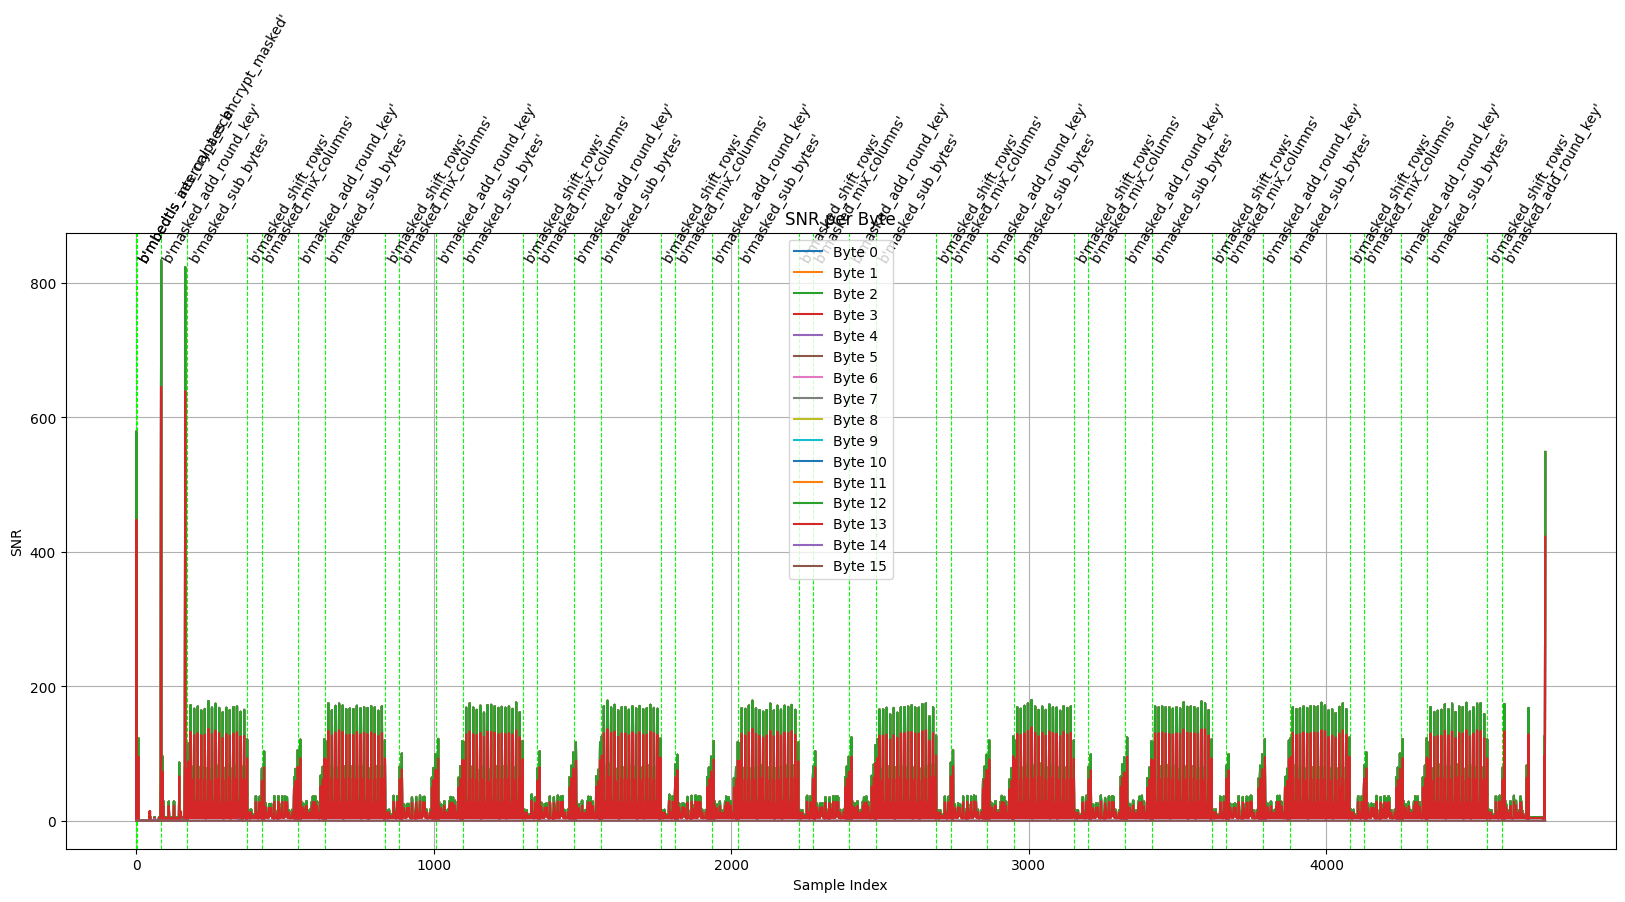

In [ ]:
h5_profiling_file_path = "/content/drive/MyDrive/mbedtls_synthetic_traces/profiling_mbedtls_masked_20250816_221308.h5"
profiling_data, profiling_metadata = load_h5_data(h5_profiling_file_path)
profiling_traces = profiling_data['traces']
profiling_labels = profiling_data['labels']

anno_idcs  = profiling_metadata['annotations_idcs']
anno_names = profiling_metadata['annotations_names']

prands = profiling_metadata['prands']
hashes = profiling_metadata['hashes']

print(f"prands head: {prands[:5]}\nhashes head: {hashes[:5]}")

plt.figure(figsize=(20, 8))
first_run = True

for byte_index in range(16):
    print(f"Computing SNR for Key Byte {byte_index}...")
    snr_curve = compute_snr_chunked(profiling_traces, profiling_labels, byte_index)
    plt.plot(snr_curve, label=f'Byte {byte_index}')

    if first_run:
      first_run = False
      for sample_index, function_name in zip(anno_idcs, anno_names):
        # Draw a vertical dashed line at the function's start time
        plt.axvline(x=sample_index, color='lime', linestyle='--', linewidth=0.8)
        # Add a text label for the function name
        plt.text(sample_index, max(snr_curve), function_name, rotation=60)

plt.title("SNR per Byte")
plt.xlabel("Sample Index")
plt.ylabel("SNR")
plt.legend()
plt.grid(True)
plt.show()

# ASCAD baseline

In [ ]:
ascad_path = '/content/drive/MyDrive/ASCAD_databases/ATMega8515_raw_traces.h5'

n_samples = 10000
targeted_sbox_index = 2

f = h5py.File(ascad_path, "r")
l = f['traces'][:n_samples, :]

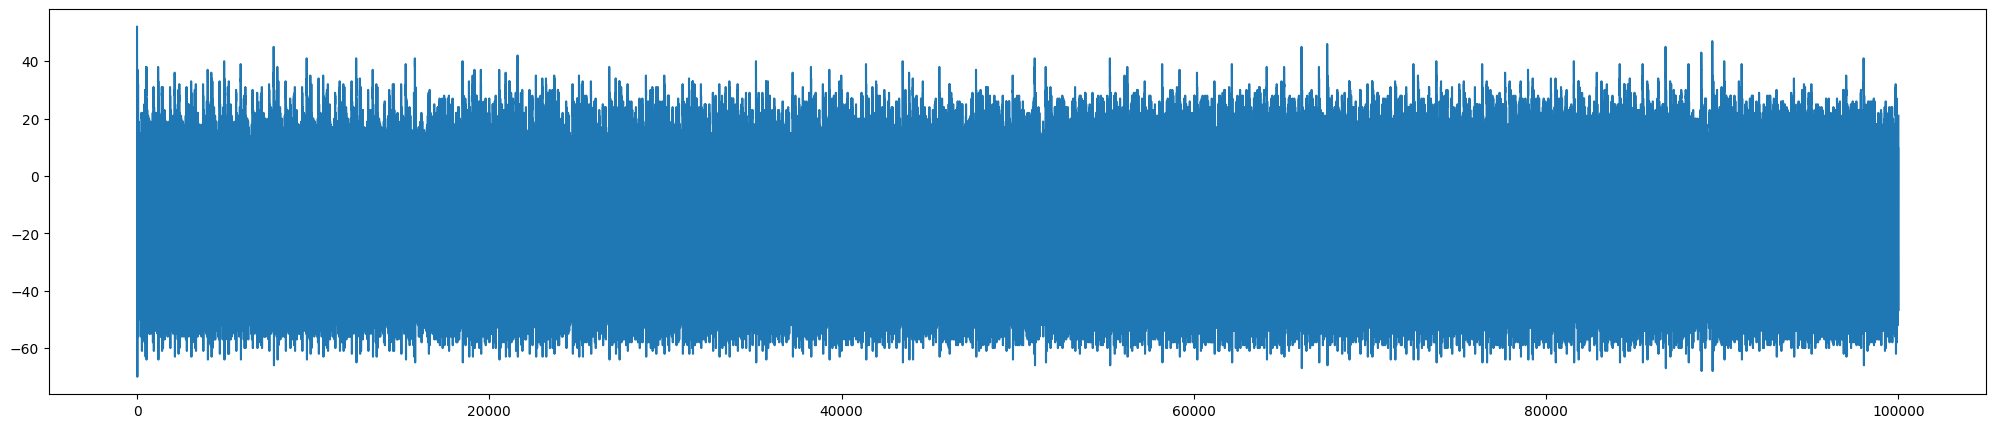

In [ ]:
plt.figure(figsize=(25,5))
for i in range(1):
  plt.plot(l[i])
plt.show()

In [ ]:
Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

HW = np.array([bin(n).count("1") for n in range(0,256)])

In [ ]:
l = l.astype(float)
data = np.array(f['metadata'][:n_samples])
k    = data['key'][:,targeted_sbox_index]
p    = data['plaintext'][:,targeted_sbox_index]
r    = data['masks'][:,targeted_sbox_index-2]
rout = data['masks'][:,15]

id_label_withMaskRout    = Sbox[k^p]^rout
hw_label_withMaskRout    = HW[id_label_withMaskRout]
id_label_withoutMaskRout = id_label_withMaskRout^rout
hw_label_withoutMaskRout = HW[id_label_withoutMaskRout]
id_label_withMaskR       = Sbox[k^p]^r

In [ ]:
hw_label_withMaskRout.shape

(10000,)

In [ ]:
trace_length = l.shape[1]
mean = np.zeros([256,trace_length])
var  = np.zeros([256,trace_length])
cpt  = np.zeros(256)
i = 0

for trace in l:
    mean[id_label_withoutMaskRout[i]]  += trace
    var [id_label_withoutMaskRout[i]]  += np.square(trace)
    cpt [id_label_withoutMaskRout[i]]  += 1
    i+=1

for i in range(256):
    mean[i] = mean[i] / cpt[i]
    var[i]  = var[i]  / cpt[i] - np.square(mean[i])

In [ ]:
varMean = np.var  (mean,0)
MeanVar = np.mean (var,0)

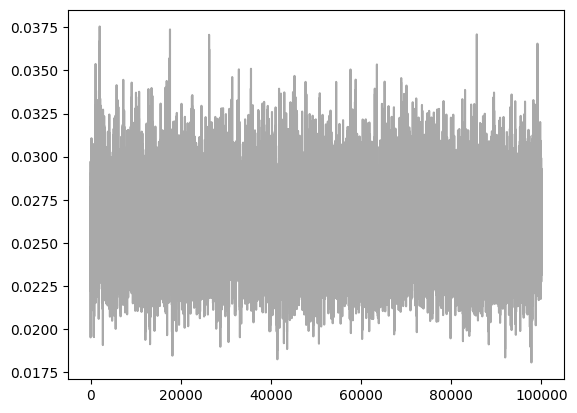

In [ ]:
plt.plot((varMean/MeanVar),'darkgray',label='snr1')

In [ ]:
my_snr_their_data = compute_snr(l, id_label_withoutMaskRout)

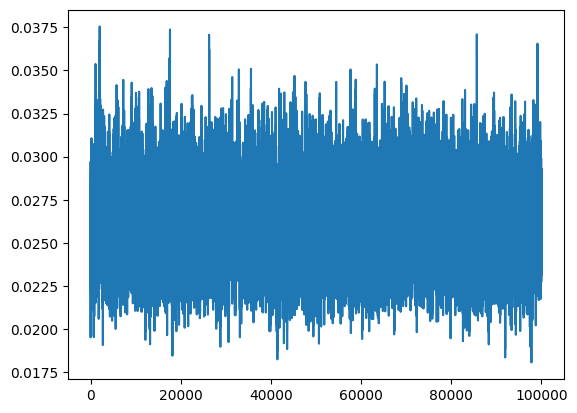

In [ ]:
plt.plot(my_snr_their_data)
plt.show()

# Experimental - check SNR [RANDOM]



In [7]:
def load_h5_data(file_path, load_meta=True):
    """
    Opens an HDF5 file and returns handles to the datasets.
    """
    try:
        in_file=h5py.File(file_path, "r")
        metadata = {
          "plaintexts": in_file['plaintexts'],
          "key": in_file['key'],
          "masks_rin": in_file['masks_rin'],
          "masks_rout": in_file['masks_rout'],
          "annotations_idcs": in_file['annotations_idcs'],
          "annotations_names": in_file['annotations_names'],
          # "prands": in_file['prands'],
          # "hashes": in_file['hashes']
        }
        data = {
            "traces": in_file['traces'],
            "labels": in_file['labels']
        }
        if load_meta:
          return data, metadata
        else:
          return data
    except IOError:
        print(f"Error: Can't open HDF5 file '{file_path}' for reading.")
        return None, None

In [14]:
import h5py

# --- CONFIG ---
# Use the path to your original, full-trace HDF5 file for the RANDOM dataset
RAW_H5_PATH_PROFILE = "/content/drive/MyDrive/mbedtls_synthetic_traces/profiling_mbedtls_masked_20250727_235810.h5"
h5_attack_file_path = "/content/drive/MyDrive/mbedtls_synthetic_traces/raw_attack_mbedtls_masked_20250728_012224.h5"
TARGET_BYTE = 15

# Load the HDF5 file handles (this is memory-efficient)
data, metadata = load_h5_data(RAW_H5_PATH_PROFILE)

# data['traces'] is now an HDF5 dataset object, not a numpy array in memory

In [15]:
print(f"Computing SNR for Byte {TARGET_BYTE}...")
snr_result = compute_snr_chunked(
    traces_h5=data['traces'],
    labels_h5=data['labels'],
    byte_index=TARGET_BYTE
)
print("SNR computation complete.")

Computing SNR for Byte 15...
SNR computation complete.


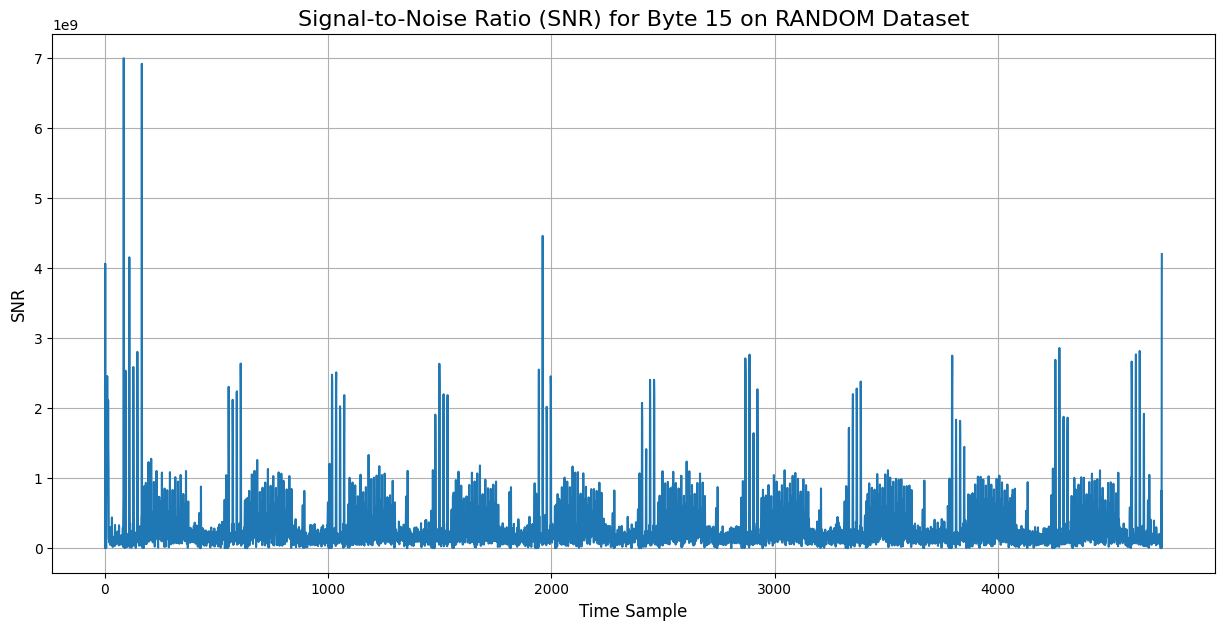

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(snr_result)
plt.title(f'Signal-to-Noise Ratio (SNR) for Byte {TARGET_BYTE} on RANDOM Dataset', fontsize=16)
plt.xlabel('Time Sample', fontsize=12)
plt.ylabel('SNR', fontsize=12)
plt.grid(True)
plt.show()